In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load MNIST data 
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.fashion_mnist.load_data()

# flattens image into 1D vector (length 784) / intger to float / normalizes [0,255] to [0,1]
X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

# convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)

In [11]:
# L2 regularization: weight decay ensuring weights remain small
# dropout: randomly drop neurons from network during training
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2), # drops out 20% of neurons
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="categorical_crossentropy", # measures how far predicted probabilities are from true labels
              optimizer="adam", # adjusts learning rate automatically for each weight
              metrics=["accuracy"]) # model reports classification accuracy

history_l2_reg = model.fit(X_train_mnist,y_train_mnist, # starts training
                           epochs=20,verbose=1,batch_size=128, # loops through training data 20x 
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6947 - loss: 1.1700 - val_accuracy: 0.7515 - val_loss: 0.9712
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6418 - loss: 6.3353 - val_accuracy: 0.6656 - val_loss: 13.2681
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5269 - loss: 58.5335 - val_accuracy: 0.5814 - val_loss: 76.3367
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4954 - loss: 205.1859 - val_accuracy: 0.5724 - val_loss: 239.0284
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4720 - loss: 454.2839 - val_accuracy: 0.3784 - val_loss: 473.6920
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4656 - loss: 707.9646 - val_accuracy: 0.4044 - val_loss: 1496.5447
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4557 - loss: 1132.1581 - val_accuracy: 0.5120 - val_loss: 770.7822
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4472 - l

In [13]:
# early stopping: stops training when validation loss stops improving, preventing overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor = "val_loss", # models watches validation loss during training
    patience = 2, # if validation loss doesn't improve for 2 consecutive epochs training stops early
    restore_best_weights = True # after stopping, model rolls back to weights from epoch with best (lowest) validation loss
)

# store training and validation accuracy/loss per epoch
history = model.fit(X_train_mnist,y_train_mnist, 
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist),
                           callbacks=[early_stopping])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4081 - loss: 17524.5996 - val_accuracy: 0.4065 - val_loss: 20619.7695
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4006 - loss: 20810.5156 - val_accuracy: 0.3580 - val_loss: 23122.6484
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4006 - loss: 25277.5898 - val_accuracy: 0.3609 - val_loss: 25523.7617


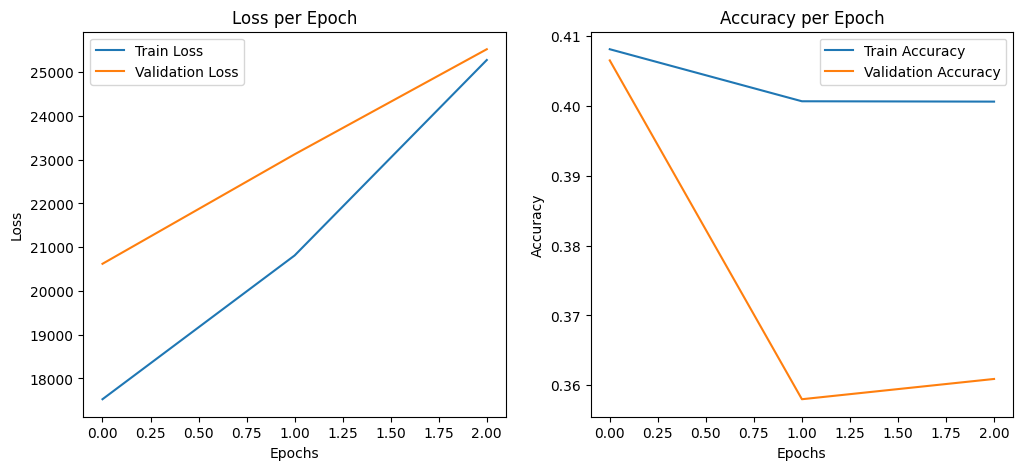

In [ ]:
# plotting training vs validation metrics
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# load MNIST data
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.fashion_mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

In [20]:
# convert labels to integers
y_train = np.argmax(y_train_mnist, axis=1) if y_train_mnist.ndim > 1 else y_train_mnist
y_test = np.argmax(y_test_mnist, axis=1) if y_test_mnist.ndim > 1 else y_test_mnist

In [21]:
# build and train ML model (logistic regression)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_mnist, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred = log_reg.predict(X_test_mnist)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")

Logistic Regression Test Accuracy: 0.8443
